Se encontró una coincidencia para 'formula una': 'formula one 2001'.
Se recomendó el juego: 'formula one 2001' (coincidencia encontrada).
Se encontró una coincidencia para 'anmial corssig': 'animal crossing'.
Se recomendó el juego: 'animal crossing' (coincidencia encontrada).
Se encontró una coincidencia para 'call of duty': 'call of duty'.
Se recomendó el juego: 'call of duty' (coincidencia encontrada).

Calculando similitudes usando el método Coseno:


/tmp/ipykernel_11333/1893832099.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Similitud', y='Juego Similar', data=df_similitudes, palette='viridis')


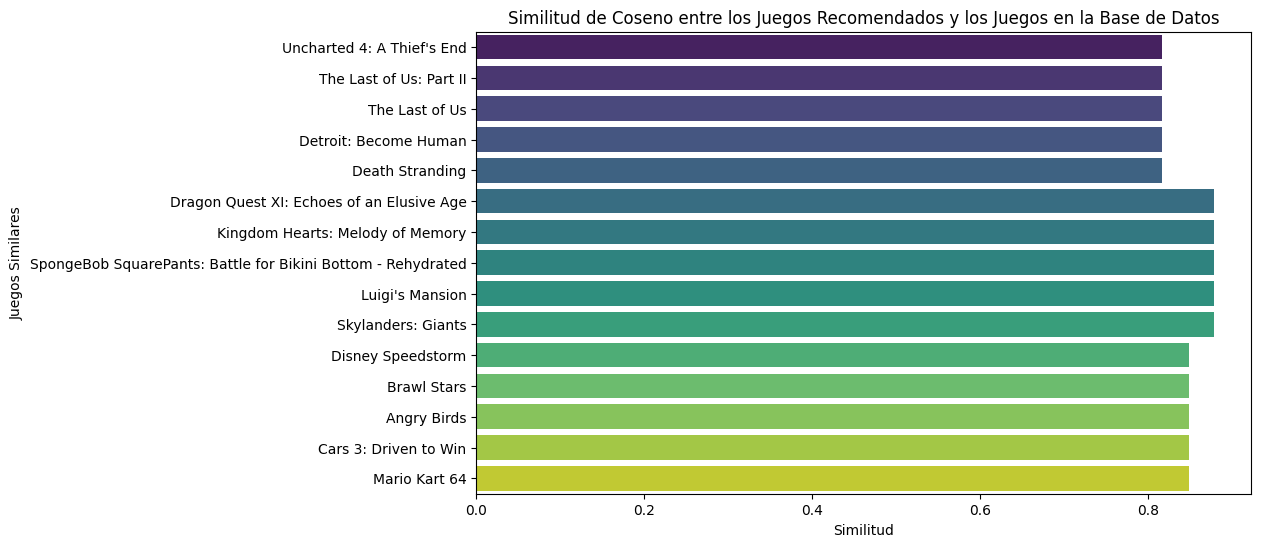


Valores de Similitud de Coseno entre los Juegos Recomendados y los demás Juegos:
                                        Juego Similar  Similitud
0                          Uncharted 4: A Thief's End   0.817219
1                             The Last of Us: Part II   0.817219
2                                      The Last of Us   0.817219
3                               Detroit: Become Human   0.817219
4                                     Death Stranding   0.817219
5           Dragon Quest XI: Echoes of an Elusive Age   0.878931
6                    Kingdom Hearts: Melody of Memory   0.878931
7   SpongeBob SquarePants: Battle for Bikini Botto...   0.878931
8                                     Luigi's Mansion   0.878931
9                                  Skylanders: Giants   0.878931
10          Dragon Quest XI: Echoes of an Elusive Age   0.878931
11                   Kingdom Hearts: Melody of Memory   0.878931
12  SpongeBob SquarePants: Battle for Bikini Botto...   0.878931
13      

/tmp/ipykernel_11333/1893832099.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Similitud', y='Juego Similar', data=df_similitudes, palette='viridis')


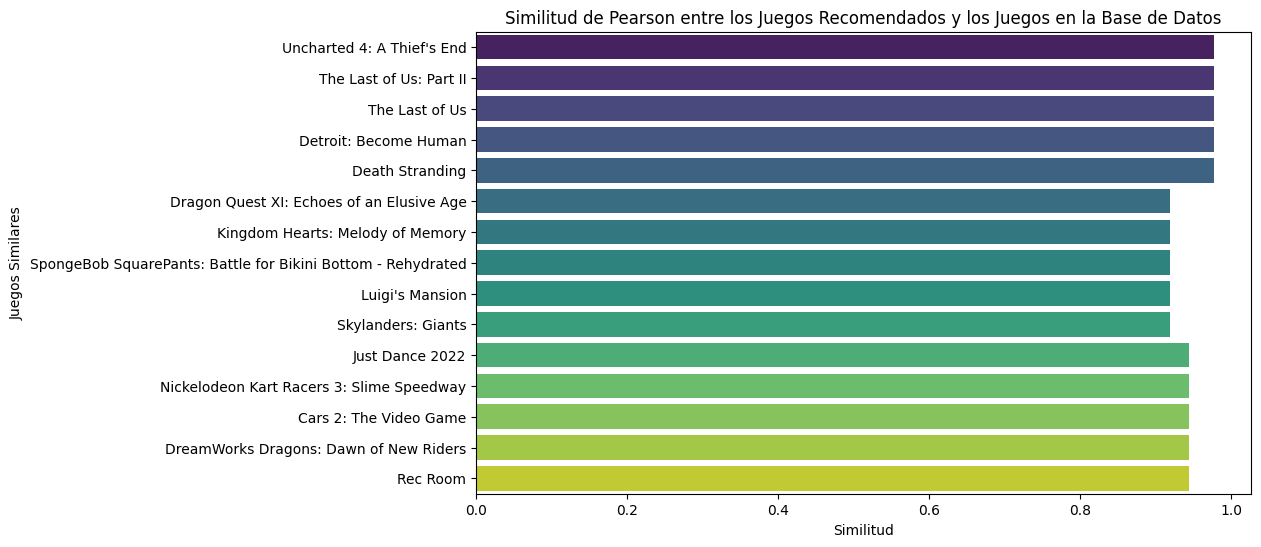


Valores de Similitud de Pearson entre los Juegos Recomendados y los demás Juegos:
                                        Juego Similar  Similitud
0                          Uncharted 4: A Thief's End   0.977476
1                             The Last of Us: Part II   0.977476
2                                      The Last of Us   0.977476
3                               Detroit: Become Human   0.977476
4                                     Death Stranding   0.977476
5           Dragon Quest XI: Echoes of an Elusive Age   0.919327
6                    Kingdom Hearts: Melody of Memory   0.919327
7   SpongeBob SquarePants: Battle for Bikini Botto...   0.919327
8                                     Luigi's Mansion   0.919327
9                                  Skylanders: Giants   0.919327
10          Dragon Quest XI: Echoes of an Elusive Age   0.919327
11                   Kingdom Hearts: Melody of Memory   0.919327
12  SpongeBob SquarePants: Battle for Bikini Botto...   0.919327
13     

/tmp/ipykernel_11333/1893832099.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Similitud', y='Juego Similar', data=df_similitudes, palette='viridis')


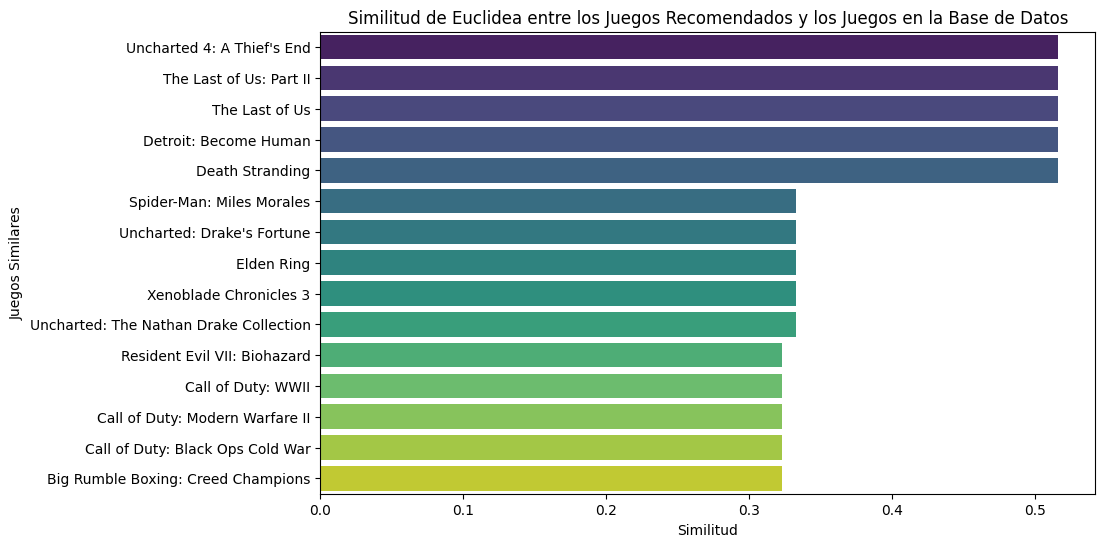


Valores de Similitud de Euclidea entre los Juegos Recomendados y los demás Juegos:
                             Juego Similar  Similitud
0               Uncharted 4: A Thief's End   0.516374
1                  The Last of Us: Part II   0.516374
2                           The Last of Us   0.516374
3                    Detroit: Become Human   0.516374
4                          Death Stranding   0.516374
5                Spider-Man: Miles Morales   0.332471
6               Uncharted: Drake's Fortune   0.332471
7                               Elden Ring   0.332471
8                   Xenoblade Chronicles 3   0.332471
9   Uncharted: The Nathan Drake Collection   0.332471
10               Spider-Man: Miles Morales   0.332471
11              Uncharted: Drake's Fortune   0.332471
12                              Elden Ring   0.332471
13                  Xenoblade Chronicles 3   0.332471
14  Uncharted: The Nathan Drake Collection   0.332471
15            Resident Evil VII: Biohazard   0.32307

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import correlation
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import jaccard_score

# Cargar los datos de la base de datos inicial
df = pd.read_csv("imdb-videogames.csv")

# Normalizar los nombres de los juegos para compararlos fácilmente
df['name_normalized'] = df['name'].str.lower().str.strip()

# Función para obtener el título más similar de forma automática
def obtener_titulo_sugerido(titulo_ingresado, lista_titulos, cutoff=0.4):
    titulos_similares = difflib.get_close_matches(titulo_ingresado.lower(), lista_titulos, n=5, cutoff=cutoff)
    if titulos_similares:
        print(f"Se encontró una coincidencia para '{titulo_ingresado}': '{titulos_similares[0]}'.")
        return [titulos_similares[0]]
    else:
        print(f"No se encontró ninguna coincidencia cercana para '{titulo_ingresado}'.")
        return []

# Recolectar 3 juegos recomendados por los jugadores
recomendaciones = []

for i in range(3):
    juego = input(f"Jugador {i+1}, ingresa el nombre de tu juego recomendado: ").strip()
    titulos_encontrados = obtener_titulo_sugerido(juego, df['name_normalized'])
    
    if titulos_encontrados:
        recomendaciones.append(titulos_encontrados[0])
        print(f"Se recomendó el juego: '{titulos_encontrados[0]}' (coincidencia encontrada).")
    else:
        print(f"El juego '{juego}' no se encontró en la base de datos.")

# Filtrar los juegos recomendados en el DataFrame
juegos_recomendados = df[df['name_normalized'].isin(recomendaciones)]

# Definir las columnas de géneros que vamos a usar
generos_columns = ['Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']

# Convertir géneros a valores booleanos
for col in generos_columns:
    df[col] = df[col].astype(bool)

# Obtener las características (géneros) de los juegos recomendados
caracteristicas_recomendadas = juegos_recomendados[generos_columns]

# Normalizar las características de los juegos (esto es importante para calcular similitud)
scaler = StandardScaler()
caracteristicas_normalizadas = scaler.fit_transform(df[generos_columns])

# Función para calcular la similitud utilizando diferentes métodos
def calcular_similitud(metodo, caracteristicas_recomendadas, caracteristicas_normalizadas):
    if metodo == 'coseno':
        return cosine_similarity(caracteristicas_recomendadas, caracteristicas_normalizadas)
    elif metodo == 'pearson':
        # Calcular la similitud de Pearson entre las características
        similitudes_pearson = []
        for i in range(len(caracteristicas_recomendadas)):
            similitudes_pearson.append([1 - correlation(caracteristicas_recomendadas.iloc[i], row) for row in caracteristicas_normalizadas])
        return np.array(similitudes_pearson)
    elif metodo == 'euclidea':
        return 1 / (1 + euclidean_distances(caracteristicas_recomendadas, caracteristicas_normalizadas))  # Normalizar a [0,1]
    elif metodo == 'jaccard':
        similitudes_jaccard = []
        for i in range(len(caracteristicas_recomendadas)):
            similitudes_jaccard.append([jaccard_score(caracteristicas_recomendadas.iloc[i], row, average='binary') for row in caracteristicas_normalizadas])
        return np.array(similitudes_jaccard)
    elif metodo == 'coseno_ajustado':
        # Ajuste de coseno: resta el promedio de cada juego antes de calcular la similitud
        caracteristicas_recomendadas -= caracteristicas_recomendadas.mean(axis=1)[:, np.newaxis]
        return cosine_similarity(caracteristicas_recomendadas, caracteristicas_normalizadas)

# Función para graficar la similitud
def graficar_similitudes(similitudes, juegos_recomendados, df, metodo, top_n=5):
    juegos_recomendados_names = juegos_recomendados['name'].values.tolist()
    if len(similitudes) != len(juegos_recomendados_names):
        print(f"Error: La cantidad de juegos recomendados ({len(juegos_recomendados_names)}) no coincide con la dimensión de las similitudes ({len(similitudes)}).")
        return

    similitudes_list = []
    for i, juego_recomendado in enumerate(juegos_recomendados_names):
        similitudes_juego = similitudes[i]
        similitudes_juego = list(enumerate(similitudes_juego))
        similitudes_juego = sorted(similitudes_juego, key=lambda x: x[1], reverse=True)
        
        juegos_similares = similitudes_juego[1:top_n+1]
        similitudes_list.extend(juegos_similares)
    
    df_similitudes = pd.DataFrame(similitudes_list, columns=['Juego Índice', 'Similitud'])
    df_similitudes['Juego Similar'] = df_similitudes['Juego Índice'].apply(lambda x: df.iloc[x]['name'])
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Similitud', y='Juego Similar', data=df_similitudes, palette='viridis')
    plt.title(f'Similitud de {metodo.capitalize()} entre los Juegos Recomendados y los Juegos en la Base de Datos')
    plt.xlabel('Similitud')
    plt.ylabel('Juegos Similares')
    plt.show()
    
    print(f"\nValores de Similitud de {metodo.capitalize()} entre los Juegos Recomendados y los demás Juegos:")
    print(df_similitudes[['Juego Similar', 'Similitud']])

# Aplicar y graficar para cada tipo de similitud
metodos = ['coseno', 'pearson', 'euclidea', 'jaccard', 'coseno_ajustado']
for metodo in metodos:
    print(f"\nCalculando similitudes usando el método {metodo.capitalize()}:")
    similitudes = calcular_similitud(metodo, caracteristicas_recomendadas, caracteristicas_normalizadas)
    graficar_similitudes(similitudes, juegos_recomendados, df, metodo, top_n=5)


In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Cargar datos ya filtrados
df_filtrado = pd.read_csv("juegos_filtrados.csv")

# Definir columnas relevantes para la similitud (por ejemplo, géneros y rating)
columns_relevantes = ['Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller', 'rating']

# Normalizar los valores (asegurarse de que los datos numéricos están escalados)
scaler = StandardScaler()
matriz_features = scaler.fit_transform(df_filtrado[columns_relevantes])

# Calcular la matriz de similitud coseno
similaridad_coseno = cosine_similarity(matriz_features)

# Crear una función para recomendar juegos basados en un título dado
def recomendar_juegos(juego_nombre, df, similitudes, top_n=5):
    # Encontrar el índice del juego en el DataFrame
    try:
        idx = df[df['name_normalized'] == juego_nombre.lower()].index[0]
    except IndexError:
        print(f"El juego '{juego_nombre}' no se encuentra en la base de datos.")
        return pd.DataFrame()  # Devuelve un DataFrame vacío
    
    # Obtener las similitudes de este juego con los demás
    similitudes_juego = list(enumerate(similitudes[idx]))
    
    # Ordenar por similitud en orden descendente y seleccionar los más similares
    similitudes_juego = sorted(similitudes_juego, key=lambda x: x[1], reverse=True)
    
    # Extraer los índices de los juegos recomendados (excluyendo el mismo juego)
    juegos_recomendados_indices = [i[0] for i in similitudes_juego[1:top_n+1]]
    
    # Retornar un DataFrame con los juegos recomendados
    return df.iloc[juegos_recomendados_indices]

# Pedir al usuario un juego para generar recomendaciones
juego_usuario = input("Ingresa el nombre de un juego para recibir recomendaciones: ").strip()

# Generar y mostrar las recomendaciones
juegos_recomendados = recomendar_juegos(juego_usuario, df_filtrado, similaridad_coseno, top_n=5)

if not juegos_recomendados.empty:
    print("\nJuegos recomendados:\n", juegos_recomendados[['name', 'rating']])
else:
    print("\nNo se encontraron juegos similares.")


El juego 'valorant' no se encuentra en la base de datos.

No se encontraron juegos similares.
